# Analyzing Star Wars Surveys
### A dataquest.io guided project
Analysing a dataset from fivethirtyeight about Star Wars. Initially they wanted to find trends in which movies different demographics enjoyed. Their guiding question was: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

We will examine their dataset to come to our own conclusions


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
#import the data
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [77]:
#Examine the data shape
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [78]:
#Examine the columns
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Clean up the data & Columns
The columns have horrendous names (including unnamed, which is due to the multi-select options). Let's clean up the columns & row data to be cleaner and easier to read/work with

In [79]:
#Remove all rows where the respondent id is null
star_wars = star_wars[star_wars["RespondentID"].notnull()]

In [80]:
#Convert yes/no columns to bools
yes_no = {
    "Yes": True, 
    "No": False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)


## Rename/fix the columns for "Have you seen x movie?"

In [81]:
#Rename the columns to something easier to understand
newColNames = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_ep1',
    'Unnamed: 4' : 'seen_ep2',
    'Unnamed: 5' : 'seen_ep3',
    'Unnamed: 6' : 'seen_ep4',
    'Unnamed: 7' : 'seen_ep5',
    'Unnamed: 8' : 'seen_ep6',
}

star_wars = star_wars.rename(columns = newColNames)

In [82]:
#Get the movie names
columns3_9 = star_wars.columns[3:9]
movieNames = []
for column in columns3_9 :
    filmName = star_wars[column].value_counts().index.values[0]
    movieNames.append(filmName)

#Clean up the Unnamed columns (these represent films the respondent has seen)
#So if the movie title is listed, they have seen it, if NaN, they haven't seen it

#Map each column so that the movie name = True, else = False
for i in range(0,6) :
    newMap = {
        movieNames[i]: True, 
        np.NaN: False
    }
    star_wars[columns3_9[i]] = star_wars[columns3_9[i]].map(newMap)

In [83]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Rename/fix the columns for "Rank the movies"

The next question asked the respondent to rank the movies 1-6 (1 is most favourite, 6 is least favourite). 
For these columns we will recast to float and then rename the columns to be more descriptive of what they reflect

In [84]:
#Rename the columns
newColNames = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'ranking_1',
    'Unnamed: 10' : 'ranking_2',
    'Unnamed: 11' : 'ranking_3',
    'Unnamed: 12' : 'ranking_4',
    'Unnamed: 13' : 'ranking_5',
    'Unnamed: 14' : 'ranking_6',
}

star_wars = star_wars.rename(columns = newColNames)

In [85]:
#Recast all those columns as floats
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [86]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


# Start Analyzing the Data
The data is generally cleaned and easier to manipulate now. Let's start looking for trends

## Find the most liked movie
Since we have ranking values for each movie it is easiest to just take the mean of each column to see which movie has the highest average rankings


In [87]:
#Get the ranking columns
mean_rankings = star_wars[star_wars.columns[9:15]].mean().reset_index()
mean_rankings = mean_rankings.rename(columns = {0 : 'meanRating'})

mean_rankings


,index,meanRating
0,ranking_1,3.732934
1,ranking_2,4.087321
2,ranking_3,4.341317
3,ranking_4,3.272727
4,ranking_5,2.513158
5,ranking_6,3.047847


## BUT WAIT! Rankings are 1-6 descending!
Since a lower ranking is equivalent to a respondent liking the movie more, we need to ensure that is conveyed in our next step.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



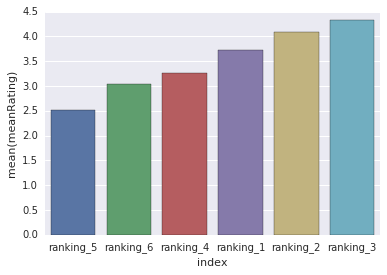

In [88]:
#reorder the frame
mean_rankings = mean_rankings.sort_values(by = 'meanRating')
#plot it
sns.barplot(data = mean_rankings, x="index", y="meanRating")
plt.show()

## Episode 5 is, on average, the higest rated Star Wars Movie
From this chart we can see that Ep 5 is most commonly higher rated than the other columns. Therefore we can conclude that ep 5 (The Empire Strikes Back) is consistently ranked as one of the best Star Wars Movies by these respondents. 

## Checking which movie has been seen the most 
The dataset also includes columns reflecting which movies the respondents have seen. We can sum each of these columns to rank the most viewed SW movies. 

In [89]:
#Capture the sum of the viewing columns (NB true = 1, false = 0)
sum_viewings = star_wars[star_wars.columns[3:9]].sum().reset_index()
sum_viewings = sum_viewings.rename(columns = {0: 'sumViewings'})
sum_viewings

,index,sumViewings
0,seen_ep1,673
1,seen_ep2,571
2,seen_ep3,550
3,seen_ep4,607
4,seen_ep5,758
5,seen_ep6,738


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



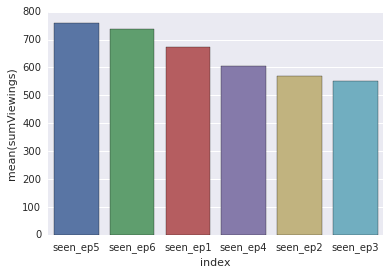

In [90]:
#reorder the frame so most viewed is FIRST
sum_viewings = sum_viewings.sort_values(by = 'sumViewings', ascending = False)
#plot it
sns.barplot(data = sum_viewings, x="index", y="sumViewings")
plt.show()

## So not only is Ep 5 the highest rated, it's also the most viewed

Ep 5 is clearly doing well in these rankings, we can also see that ep3 has been viewed the least amount of times by our respondents, which is correlating to lower average rankings. 

# Stratifying on Demographics
The data also contains some demographic questions that we can isolate.
- Do you consider yourself a fan of Star Wars?
- Do you consider yourself a fan of Star Trek?
- Gender (M/F)

Let's isolate gender and look for trends

In [91]:
#Create a DF of only female respondents
females = star_wars[star_wars["Gender"] == 'Female']
#Create a DF of only male respondents
males = star_wars[star_wars["Gender"] == 'Male']

In [92]:
#Check for the highest ranking film for Male and Female (same procedure as above, just done on each gender id)
#Get the ranking columns
male_rankings = males[males.columns[9:15]].mean().reset_index()
male_rankings = male_rankings.rename(columns = {0 : 'meanRating'})
print("MALE RANKINGS")
male_rankings

MALE RANKINGS


,index,meanRating
0,ranking_1,4.037825
1,ranking_2,4.224586
2,ranking_3,4.274882
3,ranking_4,2.997636
4,ranking_5,2.458629
5,ranking_6,3.002364


In [93]:
female_rankings = females[females.columns[9:15]].mean().reset_index()
female_rankings = female_rankings.rename(columns = {0 : 'meanRating'})
print("FEMALE RANKINGS")
female_rankings

FEMALE RANKINGS


,index,meanRating
0,ranking_1,3.429293
1,ranking_2,3.954660
2,ranking_3,4.418136
3,ranking_4,3.544081
4,ranking_5,2.569270
5,ranking_6,3.078086


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



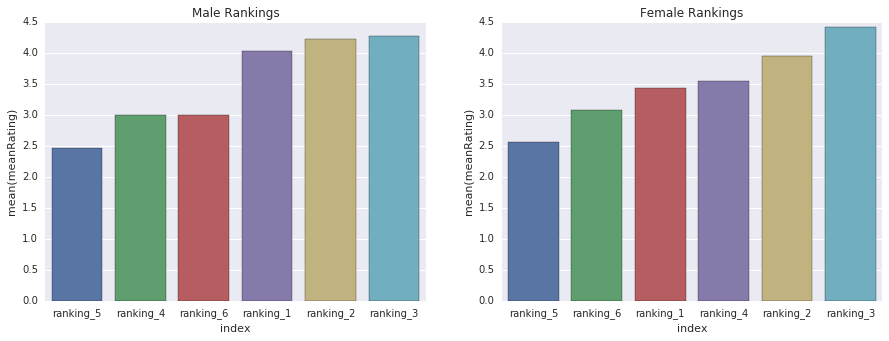

In [107]:
#reorder the frames
male_rankings = male_rankings.sort_values(by = 'meanRating')
female_rankings = female_rankings.sort_values(by = 'meanRating')

#Set up the plots
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.barplot(data = male_rankings, x="index", y="meanRating", ax=axs[0]).set_title("Male Rankings")
sns.barplot(data = female_rankings, x="index", y="meanRating", ax=axs[1]).set_title("Female Rankings")

plt.show()

## Males tend to prefer the original trilogy, whereas females liked Ep 1
Interestingly, males show a clear delineation between the original trilogy and the prequels. Females show more of a linear trend and swap ep 1/4. This MIGHT indicate that female viewers were less likely to have seen the original trilogy before viewing the prequels. More data is needed to determine order. 

# What about Viewing then?
Let's determine which of the movies M/F have seen. We will perform the same analysis as before, just on two datasets. We can identify if females are less likely to have seen the original trilogy

In [109]:
#Capture the sum of the viewing columns (NB true = 1, false = 0)
male_sum_viewings = males[males.columns[3:9]].sum().reset_index()
male_sum_viewings = male_sum_viewings.rename(columns = {0: 'sumViewings'})
print("MALE SUM VIEWINGS")
male_sum_viewings

MALE SUM VIEWINGS


,index,sumViewings
0,seen_ep1,361
1,seen_ep2,323
2,seen_ep3,317
3,seen_ep4,342
4,seen_ep5,392
5,seen_ep6,387


In [110]:
#Capture the sum of the viewing columns (NB true = 1, false = 0)
female_sum_viewings = females[females.columns[3:9]].sum().reset_index()
female_sum_viewings = female_sum_viewings.rename(columns = {0: 'sumViewings'})
print("FEMALE SUM VIEWINGS")
female_sum_viewings

FEMALE SUM VIEWINGS


,index,sumViewings
0,seen_ep1,298
1,seen_ep2,237
2,seen_ep3,222
3,seen_ep4,255
4,seen_ep5,353
5,seen_ep6,338


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



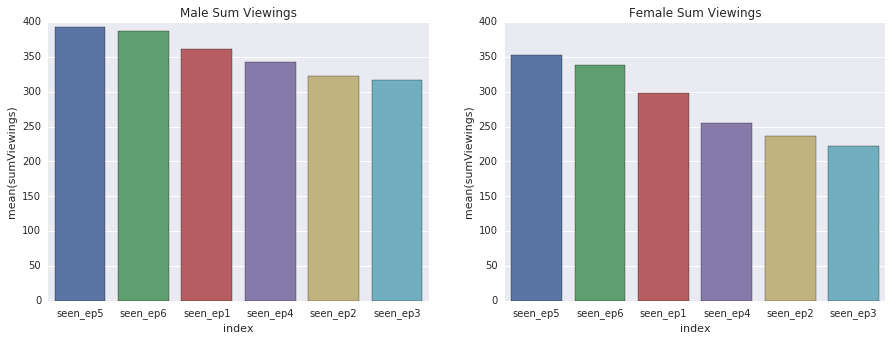

In [111]:
#reorder the frame so most viewed is FIRST
male_sum_viewings = male_sum_viewings.sort_values(by = 'sumViewings', ascending = False)
female_sum_viewings = female_sum_viewings.sort_values(by = 'sumViewings', ascending = False)

#Set up the plots
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.barplot(data = male_sum_viewings, x="index", y="sumViewings", ax=axs[0]).set_title("Male Sum Viewings")
sns.barplot(data = female_sum_viewings, x="index", y="sumViewings", ax=axs[1]).set_title("Female Sum Viewings")

plt.show()


## It seems that gender is not as much of a factor in which episodes are viewed
However, there is a decline in the number of female respondents overall, seeming to indicate that fewer people identifying as female have seen Star Wars overall

# Conclusion & Next Steps
There are other demographic details in this data that can be explored, those would be logical next steps for the analysis. 

From this analysis we can determine that, YES, Episode 5 is the best one, and the majority of respondents, both men and women, indicate that it is the best one. Also notably, episode 3 is consistently ranked as the worst!